# Exploratory Data Analysis: coffee leaf

In [24]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

dataset_path = './dataset/Photos'
image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.jpg', '.png'))]

print(f"Total images in dataset: {len(image_files)}")


Total images in dataset: 1560


#### Check for images integrity

In [25]:
from PIL import Image, UnidentifiedImageError

corrupted_images = []

for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)

    try:
        with Image.open(img_path) as img:
            img.verify()
    except (UnidentifiedImageError, IOError):
        corrupted_images.append(img_file)

if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images:")
    for img in corrupted_images:
        print(img)
else:
    print("No corrupted images found!")

for img_file in corrupted_images:
    os.remove(os.path.join(dataset_path, img_file))
    print(f"Deleted corrupted file: {img_file}")


No corrupted images found!


### Check for images saturation

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

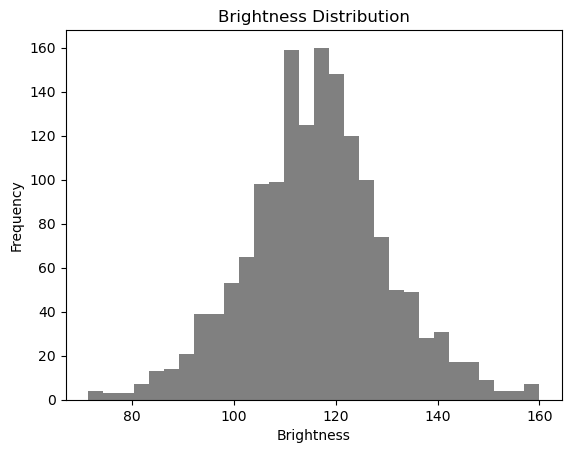

In [26]:
def compute_brightness(image):
    return np.mean(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))  # Convert to grayscale & compute mean

brightness_values = [compute_brightness(cv2.imread(os.path.join(dataset_path, img_file)))
                     for img_file in image_files if cv2.imread(os.path.join(dataset_path, img_file)) is not None]

plt.hist(brightness_values, bins=30, color='gray')
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


#### Check for blurry images

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

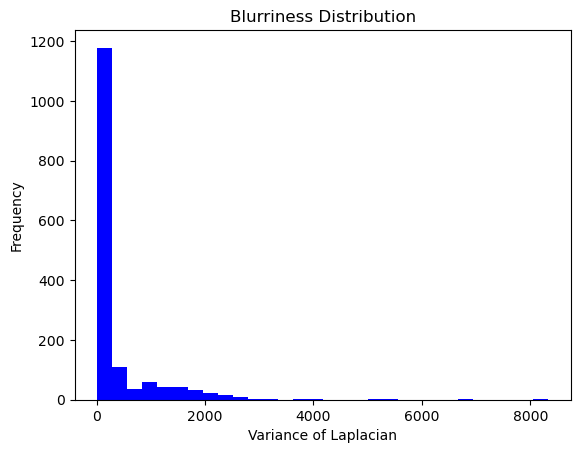

In [27]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()  # Compute Laplacian variance

blur_scores = [variance_of_laplacian(cv2.imread(os.path.join(dataset_path, img_file), cv2.IMREAD_GRAYSCALE))
               for img_file in image_files if cv2.imread(os.path.join(dataset_path, img_file)) is not None]

plt.hist(blur_scores, bins=30, color='blue')
plt.title("Blurriness Distribution")
plt.xlabel("Variance of Laplacian")
plt.ylabel("Frequency")
plt.show()


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

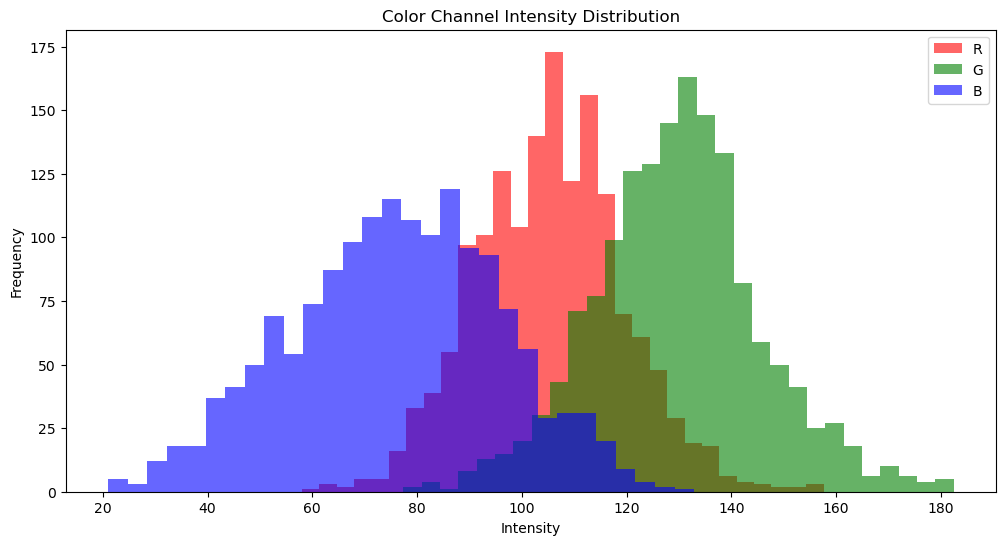

In [28]:
means = {'R': [], 'G': [], 'B': []}

for img_file in image_files:
    img = cv2.imread(os.path.join(dataset_path, img_file))
    if img is not None:
        b, g, r = cv2.mean(img)[:3]  # Extract mean BGR values
        means['B'].append(b)
        means['G'].append(g)
        means['R'].append(r)

plt.figure(figsize=(12, 6))
for color in ['R', 'G', 'B']:
    plt.hist(means[color], bins=30, alpha=0.6, label=color, color=color.lower())
plt.title("Color Channel Intensity Distribution")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#### Clustering similar images using K-MEANS

In [29]:
from sklearn.cluster import KMeans

def extract_color_histogram(image_path, bins=(8, 8, 8)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

features = np.array([extract_color_histogram(os.path.join(dataset_path, img_file))
                     for img_file in image_files if cv2.imread(os.path.join(dataset_path, img_file)) is not None])
num_clusters = 2  # Change this based on expected groups
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(features)

clustered_images = {i: [] for i in range(num_clusters)}
for img_file, label in zip(image_files, labels):
    clustered_images[label].append(img_file)

# Print results
for cluster, images in clustered_images.items():
    print(f"Cluster {cluster}: {len(images)} images")


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

Cluster 0: 592 images
Cluster 1: 968 images
